In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  

In [2]:
diabetes = pd.read_csv("Datasets/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

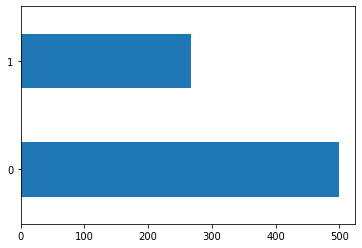

In [5]:
df['Outcome'].value_counts().plot.barh() # bar dikey, barh yatay grafik

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)

# statsmodels

In [8]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()
# p değerinin alpha'dan küçük olduğu değerler bizim için anlam ifade etmektedir. 

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                 0.05922
Time:                        10:53:26   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

# scikit-learn

In [9]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
loj_model.intercept_, loj_model.coef_

(array([-5.89159518]),
 array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
          7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
          6.77671880e-01,  7.23947807e-03]]))

## Tahmin & Model Tuning

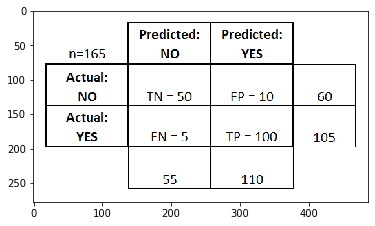

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Resources\confusion_matrix2.png')
imgplot = plt.imshow(img)

#### confusion matrix

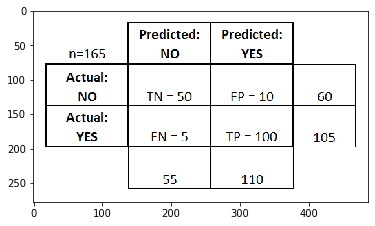

In [12]:
imgplot = plt.imshow(img)

bir modelin sadece accuracy'sine bakmak yeterli değildir. F-score, overall score gibi diğer değerlere de bakmak gereklidir.     
Accuracy : Overall, how often is the classifier correct? = (TP+TN) / total = (100+50) / 165 = 0.91              
Missclassification rate : Overall, how often is it wrong? = (FP+FN) / total = (10+5) / 165 = 0.09         
TP Rate : when it's actually yes, how often does it predict yes? = TP/actual yes = 100/105 = 0.95         
Precision: When it predicts yes, how often is it correct? = TP / predicted yes = 100/110 = 0.91            
F Score : This is a weighted average of the true positive rate (recall) and precision

In [13]:
y_pred = loj_model.predict(X)
confusion_mat = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Counfusion matrix: \n",confusion_mat)
print("Accuracy: ",accuracy)

Counfusion matrix: 
 [[448  52]
 [121 147]]
Accuracy:  0.7747395833333334


In [14]:
# Accuracy : (TP+TN) / total
(147+448) / sum(sum(confusion_mat))

0.7747395833333334

In [15]:
# Missclassification rate : (FP+FN) / total      
(121 + 52) / sum(sum(confusion_mat))

0.22526041666666666

In [16]:
# TP Rate : TP/actual yes 
147 / (121+147)

0.5485074626865671

In [17]:
# Precision: TP / predicted yes
147 / (52+147)

0.7386934673366834

In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [19]:
loj_model.predict(X)[0:10]
# X verileri ile tahmin etme

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [20]:
loj_model.predict_proba(X)[0:10]
# 0 olma ve 1 olma ihtimallerini veriyor

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [21]:
y[0:10]
# gerçek y değerlerim yukarıdaki tahmin değerleri ile kıyaslamak için

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [22]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]
# değerlerin 1 olma olasılıkları

array([0.64959289, 0.08298071, 0.77525915, 0.07861124, 0.8327758 ,
       0.20101325, 0.11980894, 0.7218731 , 0.67939057, 0.07727116])

In [23]:
# changing treshold of the predicting model
y_pred = [1 if i > 0.7 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]

In [24]:
accuracy_score(y, y_pred)

0.73828125

In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       500
           1       0.86      0.30      0.44       268

    accuracy                           0.74       768
   macro avg       0.79      0.64      0.64       768
weighted avg       0.77      0.74      0.69       768



In [26]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64959289, 0.08298071, 0.77525915, 0.07861124, 0.8327758 ])

In [27]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc

0.7222537313432836

In [28]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
print("fpr: ",fpr[0:10])
print("tpr: ",tpr[0:10])
print("thresholds: ",thresholds[0:10])

fpr:  [0.    0.    0.    0.002 0.002 0.004 0.004 0.006 0.006 0.008]
tpr:  [0.         0.00373134 0.01119403 0.01119403 0.03731343 0.03731343
 0.06343284 0.06343284 0.08208955 0.08208955]
thresholds:  [1.96477167 0.96477167 0.94295527 0.92647918 0.9029745  0.89771194
 0.87329592 0.87316271 0.84278751 0.84276872]


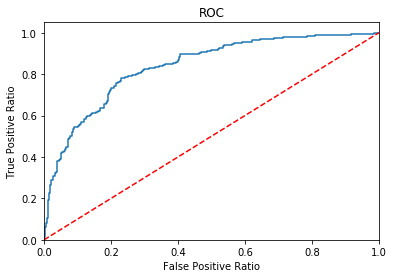

In [29]:
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [32]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_predict = loj_model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7532467532467533

In [38]:
# cross validation'da veri arasından 10 farklı set alınarak hesaplanır.
# % 77'lik accuracy yeterlidir. 
# insan davranışında 70 üzeri accuracy güzel bir sonuçtur.
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7704710144927536

In [39]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

